### Import all required libraries

In [184]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Read the smartmeter data

In [185]:
data =  pd.read_csv('daily_dataset.csv/daily_dataset.csv')

Showcasing the structure of the data so that it becomes easier to manipulate it.

In [186]:
data.head(3)

,LCLid,day,energy_median,energy_mean,energy_max,energy_count,energy_std,energy_sum,energy_min
0,MAC000131,2011-12-15,0.4850,0.432045,0.868,22,0.239146,9.505,0.072
1,MAC000131,2011-12-16,0.1415,0.296167,1.116,48,0.281471,14.216,0.031
2,MAC000131,2011-12-17,0.1015,0.189812,0.685,48,0.188405,9.111,0.064


Cleaning the  data. (removing null and 0 values)

In [187]:
data.energy_mean.replace('0',None, inplace=True)
data.dropna(subset=['energy_mean'], inplace=True)

Reading the weather data

In [188]:
weather_data = pd.read_csv('weather_daily_darksky.csv')
weather_data.head(3)

,temperatureMax,temperatureMaxTime,windBearing,icon,dewPoint,temperatureMinTime,cloudCover,windSpeed,pressure,apparentTemperatureMinTime,...,temperatureHigh,sunriseTime,temperatureHighTime,uvIndexTime,summary,temperatureLowTime,apparentTemperatureMin,apparentTemperatureMaxTime,apparentTemperatureLowTime,moonPhase
0,11.96,2011-11-11 23:00:00,123,fog,9.40,2011-11-11 07:00:00,0.79,3.88,1016.08,2011-11-11 07:00:00,...,10.87,2011-11-11 07:12:14,2011-11-11 19:00:00,2011-11-11 11:00:00,Foggy until afternoon.,2011-11-11 19:00:00,6.48,2011-11-11 23:00:00,2011-11-11 19:00:00,0.52
1,8.59,2011-12-11 14:00:00,198,partly-cloudy-day,4.49,2011-12-11 01:00:00,0.56,3.94,1007.71,2011-12-11 02:00:00,...,8.59,2011-12-11 07:57:02,2011-12-11 14:00:00,2011-12-11 12:00:00,Partly cloudy throughout the day.,2011-12-12 07:00:00,0.11,2011-12-11 20:00:00,2011-12-12 08:00:00,0.53
2,10.33,2011-12-27 02:00:00,225,partly-cloudy-day,5.47,2011-12-27 23:00:00,0.85,3.54,1032.76,2011-12-27 22:00:00,...,10.33,2011-12-27 08:07:06,2011-12-27 14:00:00,2011-12-27 00:00:00,Mostly cloudy throughout the day.,2011-12-27 23:00:00,5.59,2011-12-27 02:00:00,2011-12-28 00:00:00,0.10


# combine weather data smart meter data

In [189]:
weather_data.sort_values(by=['temperatureMaxTime','temperatureMinTime'],inplace=True)
weather_data.head(3)




,temperatureMax,temperatureMaxTime,windBearing,icon,dewPoint,temperatureMinTime,cloudCover,windSpeed,pressure,apparentTemperatureMinTime,...,temperatureHigh,sunriseTime,temperatureHighTime,uvIndexTime,summary,temperatureLowTime,apparentTemperatureMin,apparentTemperatureMaxTime,apparentTemperatureLowTime,moonPhase
13,15.57,2011-11-01 15:00:00,208,partly-cloudy-day,10.13,2011-11-01 22:00:00,0.36,2.45,1009.46,2011-11-01 22:00:00,...,15.57,2011-11-01 06:54:29,2011-11-01 15:00:00,2011-11-01 10:00:00,Partly cloudy until evening.,2011-11-02 03:00:00,9.01,2011-11-01 15:00:00,2011-11-02 03:00:00,0.21
60,15.19,2011-11-02 23:00:00,134,partly-cloudy-night,10.23,2011-11-02 03:00:00,0.39,4.39,1004.79,2011-11-02 03:00:00,...,15.06,2011-11-02 06:56:16,2011-11-02 13:00:00,2011-11-02 09:00:00,Partly cloudy throughout the day.,2011-11-02 19:00:00,7.33,2011-11-02 23:00:00,2011-11-02 19:00:00,0.24
34,17.41,2011-11-03 14:00:00,154,partly-cloudy-day,13.39,2011-11-03 21:00:00,0.52,3.99,993.40,2011-11-03 21:00:00,...,17.41,2011-11-03 06:58:03,2011-11-03 14:00:00,2011-11-03 10:00:00,Partly cloudy throughout the day.,2011-11-04 07:00:00,12.79,2011-11-03 14:00:00,2011-11-04 07:00:00,0.27


In [190]:
weather_data.temperatureMaxTime.astype('datetime64')
data['day']=data.day.astype('datetime64')
weather_data['temperatureMaxTime'] = pd.to_datetime(weather_data['temperatureMaxTime']).dt.normalize()
weather_data.rename(columns={'temperatureMaxTime':'day'},inplace=True)

data=data.join(weather_data.set_index('day'),on='day')

# household data

In [191]:
household_details = pd.read_csv('informations_households.csv')
household_details.head(3)



,LCLid,stdorToU,Acorn,Acorn_grouped,file
0,MAC005492,ToU,ACORN-,ACORN-,block_0
1,MAC001074,ToU,ACORN-,ACORN-,block_0
2,MAC000002,Std,ACORN-A,Affluent,block_0


In [192]:
data.columns
household_columns=household_details.columns

In [193]:
data.columns

Index(['LCLid', 'day', 'energy_median', 'energy_mean', 'energy_max',
       'energy_count', 'energy_std', 'energy_sum', 'energy_min',
       'temperatureMax', 'windBearing', 'icon', 'dewPoint',
       'temperatureMinTime', 'cloudCover', 'windSpeed', 'pressure',
       'apparentTemperatureMinTime', 'apparentTemperatureHigh', 'precipType',
       'visibility', 'humidity', 'apparentTemperatureHighTime',
       'apparentTemperatureLow', 'apparentTemperatureMax', 'uvIndex', 'time',
       'sunsetTime', 'temperatureLow', 'temperatureMin', 'temperatureHigh',
       'sunriseTime', 'temperatureHighTime', 'uvIndexTime', 'summary',
       'temperatureLowTime', 'apparentTemperatureMin',
       'apparentTemperatureMaxTime', 'apparentTemperatureLowTime',
       'moonPhase'],
      dtype='object')

In [194]:
#adding new columns to data
#data[[household_columns[1],household_columns[2],household_columns[3]]] = ''
#data.columns
#data.head()

#['LCLid', 'day', 'energy_median', 'energy_mean', 'energy_max','energy_count', 'energy_std', 'energy_sum', 'energy_min', 'stdorToU', 'Acorn', 'Acorn_grouped', 'file']

In [195]:
#data.set_index('LCLid', drop=False)
#household_details.set_index('LCLid', drop=False)
#data.update(household_details)
#data.head()

# Add household data to smartmeter data

In [196]:
data=data.join(household_details.set_index('LCLid'),on='LCLid')
data.head(3)

,LCLid,day,energy_median,energy_mean,energy_max,energy_count,energy_std,energy_sum,energy_min,temperatureMax,...,summary,temperatureLowTime,apparentTemperatureMin,apparentTemperatureMaxTime,apparentTemperatureLowTime,moonPhase,stdorToU,Acorn,Acorn_grouped,file
0,MAC000131,2011-12-15,0.4850,0.432045,0.868,22,0.239146,9.505,0.072,7.97,...,Partly cloudy throughout the day and breezy in...,2011-12-16 08:00:00,1.07,2011-12-15 21:00:00,2011-12-16 08:00:00,0.66,Std,ACORN-E,Affluent,block_22
1,MAC000131,2011-12-16,0.1415,0.296167,1.116,48,0.281471,14.216,0.031,4.68,...,Mostly cloudy throughout the day.,2011-12-17 08:00:00,-2.65,2011-12-16 00:00:00,2011-12-17 08:00:00,0.70,Std,ACORN-E,Affluent,block_22
2,MAC000131,2011-12-17,0.1015,0.189812,0.685,48,0.188405,9.111,0.064,5.35,...,Partly cloudy throughout the day.,2011-12-18 07:00:00,-3.56,2011-12-17 15:00:00,2011-12-18 06:00:00,0.73,Std,ACORN-E,Affluent,block_22
3,MAC000131,2011-12-18,0.1140,0.218979,0.676,48,0.202919,10.511,0.065,5.49,...,Partly cloudy until evening.,2011-12-19 01:00:00,-4.12,2011-12-18 14:00:00,2011-12-19 02:00:00,0.77,Std,ACORN-E,Affluent,block_22
4,MAC000131,2011-12-19,0.1910,0.325979,0.788,48,0.259205,15.647,0.066,6.64,...,Partly cloudy throughout the day.,2011-12-20 04:00:00,-3.67,2011-12-19 19:00:00,2011-12-20 08:00:00,0.81,Std,ACORN-E,Affluent,block_22


In [197]:
data['day']=data.day.astype('datetime64')
data.day.dtype


dtype('<M8[ns]')

# cleaning data

In [198]:
indexname=data[data['Acorn']=='ACORN-'].index
data.drop(indexname,inplace=True)
data.dropna(subset=['Acorn'], inplace=True)

In [199]:
data.drop

<bound method DataFrame.drop of              LCLid        day  energy_median  energy_mean  energy_max  \
0        MAC000131 2011-12-15         0.4850     0.432045       0.868   
1        MAC000131 2011-12-16         0.1415     0.296167       1.116   
2        MAC000131 2011-12-17         0.1015     0.189812       0.685   
3        MAC000131 2011-12-18         0.1140     0.218979       0.676   
4        MAC000131 2011-12-19         0.1910     0.325979       0.788   
...            ...        ...            ...          ...         ...   
3510428  MAC004977 2014-02-24         0.0950     0.118458       0.580   
3510429  MAC004977 2014-02-25         0.0675     0.084208       0.176   
3510430  MAC004977 2014-02-26         0.1080     0.120500       0.282   
3510431  MAC004977 2014-02-27         0.0720     0.114062       0.431   
3510432  MAC004977 2014-02-28         0.0970     0.097000       0.097   

         energy_count  energy_std  energy_sum  energy_min  temperatureMax  \
0             

In [200]:
data.head(3)

,LCLid,day,energy_median,energy_mean,energy_max,energy_count,energy_std,energy_sum,energy_min,temperatureMax,...,summary,temperatureLowTime,apparentTemperatureMin,apparentTemperatureMaxTime,apparentTemperatureLowTime,moonPhase,stdorToU,Acorn,Acorn_grouped,file
0,MAC000131,2011-12-15,0.4850,0.432045,0.868,22,0.239146,9.505,0.072,7.97,...,Partly cloudy throughout the day and breezy in...,2011-12-16 08:00:00,1.07,2011-12-15 21:00:00,2011-12-16 08:00:00,0.66,Std,ACORN-E,Affluent,block_22
1,MAC000131,2011-12-16,0.1415,0.296167,1.116,48,0.281471,14.216,0.031,4.68,...,Mostly cloudy throughout the day.,2011-12-17 08:00:00,-2.65,2011-12-16 00:00:00,2011-12-17 08:00:00,0.70,Std,ACORN-E,Affluent,block_22
2,MAC000131,2011-12-17,0.1015,0.189812,0.685,48,0.188405,9.111,0.064,5.35,...,Partly cloudy throughout the day.,2011-12-18 07:00:00,-3.56,2011-12-17 15:00:00,2011-12-18 06:00:00,0.73,Std,ACORN-E,Affluent,block_22
3,MAC000131,2011-12-18,0.1140,0.218979,0.676,48,0.202919,10.511,0.065,5.49,...,Partly cloudy until evening.,2011-12-19 01:00:00,-4.12,2011-12-18 14:00:00,2011-12-19 02:00:00,0.77,Std,ACORN-E,Affluent,block_22
4,MAC000131,2011-12-19,0.1910,0.325979,0.788,48,0.259205,15.647,0.066,6.64,...,Partly cloudy throughout the day.,2011-12-20 04:00:00,-3.67,2011-12-19 19:00:00,2011-12-20 08:00:00,0.81,Std,ACORN-E,Affluent,block_22


In [201]:
data.sort_values(by=['day'],inplace=True)

In [202]:
# weather_data['temperatureMaxTime'] = weather_data.temperatureMaxTime.astype('datetime64')

In [203]:
b=data.groupby(['day','Acorn_grouped'])

In [204]:
b

In [205]:
for q, r in b:
    print(q)
    print(r)


8 14:00:00   
2806713                    0.82        2014-02-28 14:00:00   
2812439                    0.82        2014-02-28 14:00:00   
2813895                    0.82        2014-02-28 14:00:00   
2813135                    0.82        2014-02-28 14:00:00   
2811515                    0.82        2014-02-28 14:00:00   
2810713                    0.82        2014-02-28 14:00:00   
964058                     0.82        2014-02-28 14:00:00   
964699                     0.82        2014-02-28 14:00:00   
963405                     0.82        2014-02-28 14:00:00   
971803                     0.82        2014-02-28 14:00:00   
972498                     0.82        2014-02-28 14:00:00   
970406                     0.82        2014-02-28 14:00:00   
971205                     0.82        2014-02-28 14:00:00   
966507                     0.82        2014-02-28 14:00:00   
967109                     0.82        2014-02-28 14:00:00   
965337                     0.82        2014-02-28 14:00:

In [206]:
# https://www.youtube.com/watch?v=txMdrV1Ut64   at 22:34 #### Seies indexes

In [207]:
print('hello')

hello


In [208]:
b.get_group(('2013-12-08 00:00:00', 'ACORN-U')).mean()

<ipython-input-208-6f594e3b1cad>:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  b.get_group(('2013-12-08 00:00:00', 'ACORN-U')).mean()


energy_median                 0.222102
energy_mean                   0.278257
energy_max                    0.882977
energy_count                 48.000000
energy_std                    0.191334
energy_sum                   13.356341
energy_min                    0.085500
temperatureMax               11.240000
windBearing                 241.000000
dewPoint                      5.360000
cloudCover                    0.350000
windSpeed                     4.560000
pressure                   1025.350000
apparentTemperatureHigh      11.240000
visibility                   12.870000
humidity                      0.830000
apparentTemperatureLow        3.220000
apparentTemperatureMax       11.240000
uvIndex                       1.000000
temperatureLow                6.010000
temperatureMin                5.090000
temperatureHigh              11.240000
apparentTemperatureMin        2.530000
moonPhase                     0.200000
dtype: float64

In [209]:
temp=data.groupby('day').energy_mean.mean()

In [210]:
temp

day
2011-11-23    0.281091
2011-11-24    0.234207
2011-11-25    0.224901
2011-11-26    0.247635
2011-11-27    0.226058
                ...   
2014-02-24    0.216962
2014-02-25    0.214882
2014-02-26    0.212784
2014-02-27    0.215824
2014-02-28    0.209021
Name: energy_mean, Length: 829, dtype: float64

In [211]:
temp.values

array([0.28109108, 0.23420681, 0.22490128, 0.24763544, 0.22605844,
       0.21894479, 0.21392057, 0.2040261 , 0.21962553, 0.22380872,
       0.24309821, 0.25339848, 0.24075257, 0.25305753, 0.24534816,
       0.25944678, 0.25828717, 0.28029933, 0.28662892, 0.25988354,
       0.25909552, 0.26595765, 0.26770166, 0.28760871, 0.29216142,
       0.30699787, 0.30845586, 0.2708369 , 0.26102092, 0.25537057,
       0.2588353 , 0.27221185, 0.27137285, 0.23056216, 0.23947801,
       0.24823234, 0.25983577, 0.26124292, 0.25908379, 0.25971386,
       0.26575111, 0.26913402, 0.26646693, 0.26882323, 0.26628428,
       0.26716153, 0.2790821 , 0.25966917, 0.25025034, 0.24964152,
       0.25313377, 0.26147523, 0.28249861, 0.29298774, 0.27493249,
       0.2768254 , 0.26826267, 0.25758889, 0.27179839, 0.27002645,
       0.28585973, 0.26833641, 0.27013099, 0.26368875, 0.26060767,
       0.26704712, 0.28069996, 0.29432472, 0.2827872 , 0.29459235,
       0.29190346, 0.30568124, 0.30752141, 0.31736533, 0.33215

In [212]:
uniquevalues=data['Acorn'].unique()
uniquevalues.sort()


In [213]:
uniquevalues

array(['ACORN-A', 'ACORN-B', 'ACORN-C', 'ACORN-D', 'ACORN-E', 'ACORN-F',
       'ACORN-G', 'ACORN-H', 'ACORN-I', 'ACORN-J', 'ACORN-K', 'ACORN-L',
       'ACORN-M', 'ACORN-N', 'ACORN-O', 'ACORN-P', 'ACORN-Q', 'ACORN-U'],
      dtype=object)

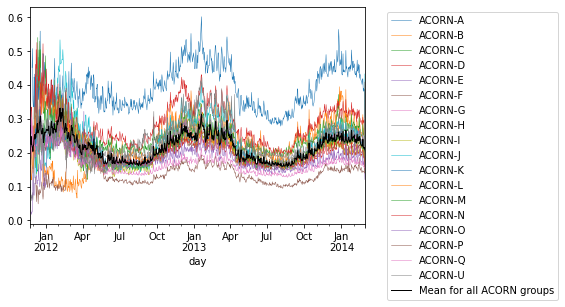

In [214]:
try: 
    del fig1
except: 
    pass
fig1 = plt.figure(1)
for i in uniquevalues:
    data[data['Acorn']==i].groupby('day').energy_mean.mean().plot(legend=True,label=i,linewidth=0.5)

data.groupby('day').energy_mean.mean().plot(legend=True,label='Mean for all ACORN groups',linewidth=1,color='black')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.show()
fig1.savefig('Acorn-graph',dpi=600,bbox_inches='tight')


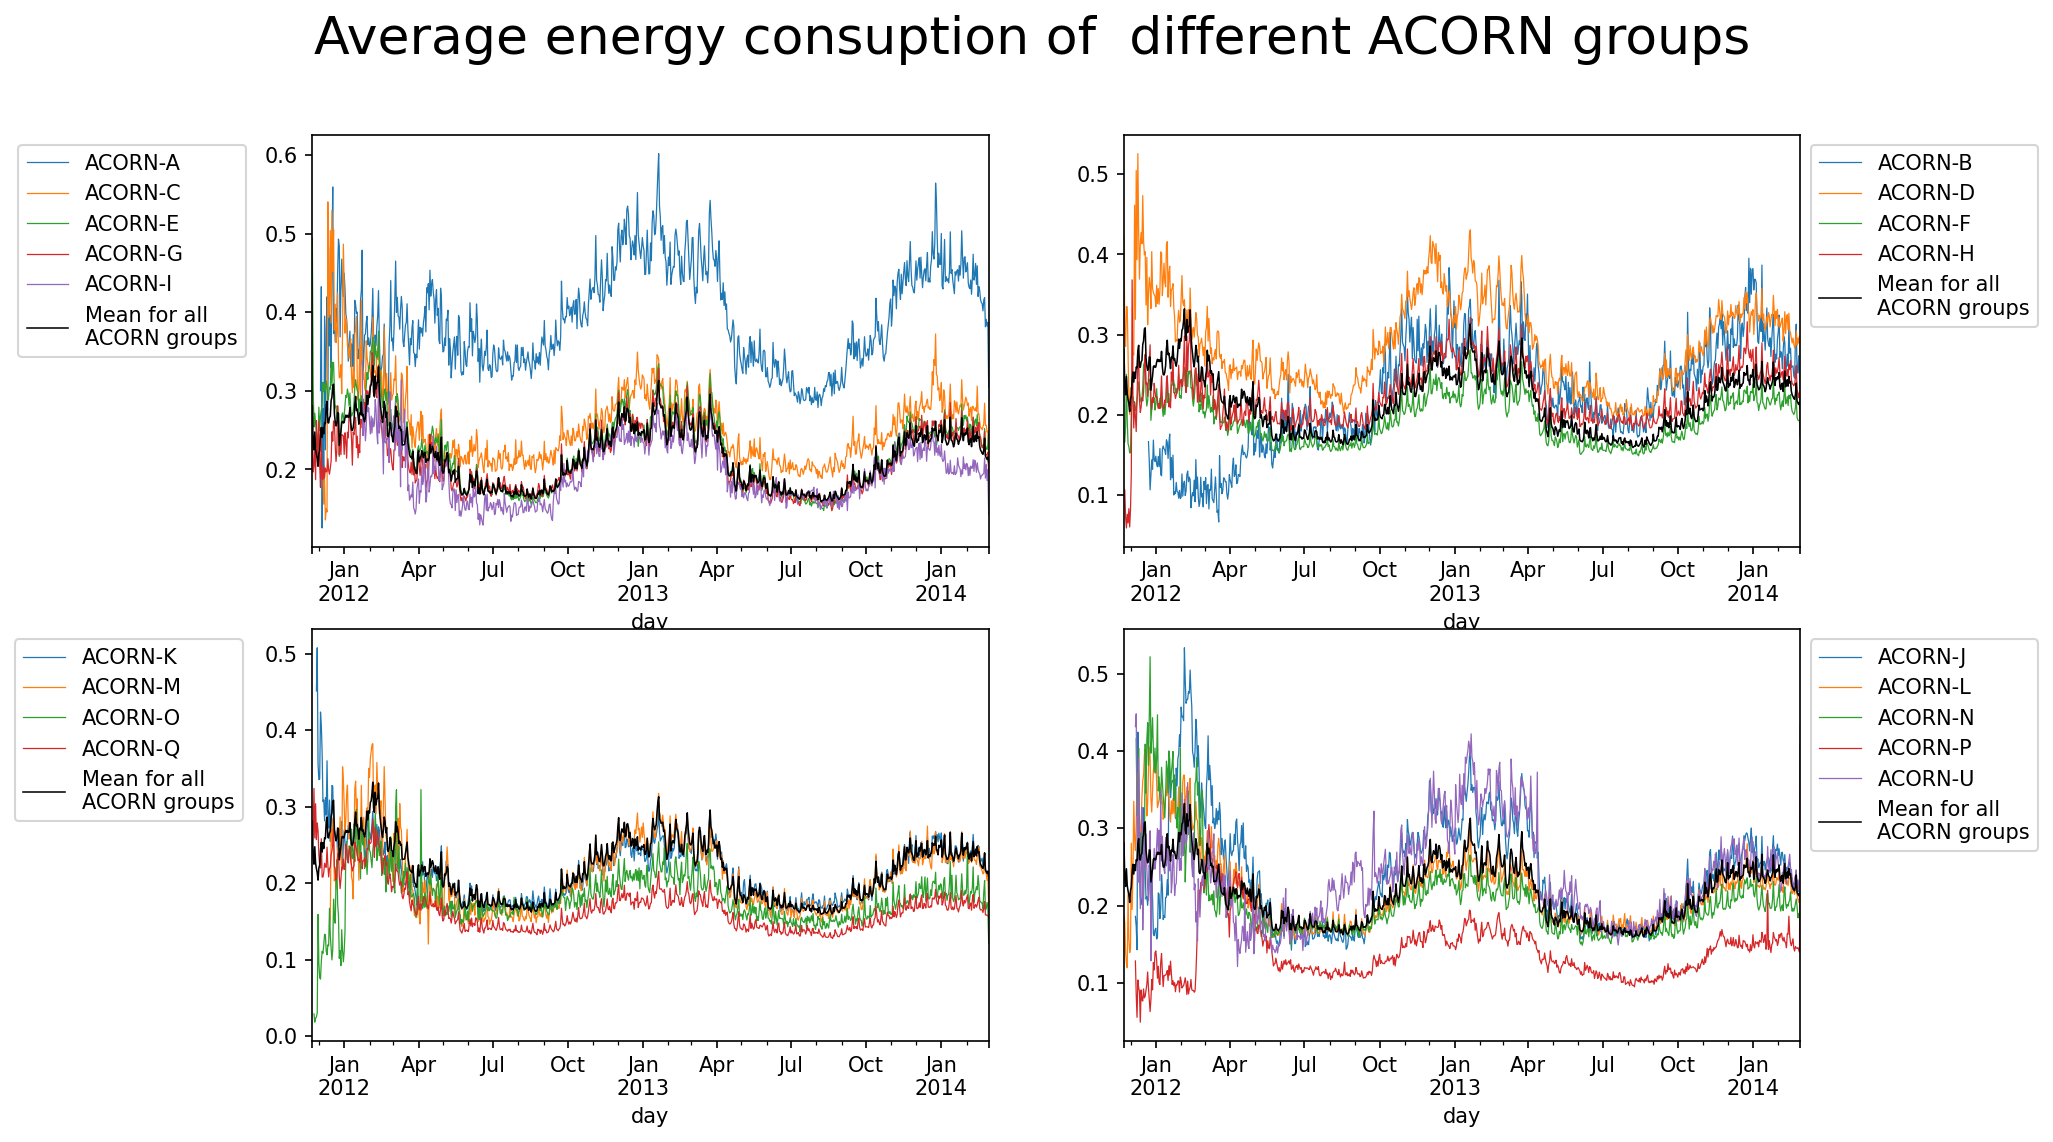

In [215]:
# gather all the types of ACORN groups.
uniquevalues=data['Acorn'].unique()
uniquevalues.sort()

# Plotting graphs of all the different ACORN groups
fig, axes = plt.subplots(nrows=2, ncols=2,figsize=(12.8,8),dpi=300)
for i in range(len(uniquevalues)):
    data[data['Acorn']==uniquevalues[i]].groupby('day').energy_mean.mean().plot(legend=True,label=uniquevalues[i],linewidth=0.6,ax=axes[i//9,i%2])

# adding average ACORN energy consumption
data.groupby('day').energy_mean.mean().plot(ax=axes[0,0],legend=True,label='Mean for all \nACORN groups',linewidth=.75,color='black')
data.groupby('day').energy_mean.mean().plot(ax=axes[0,1],legend=True,label='Mean for all \nACORN groups',linewidth=.75,color='black')
data.groupby('day').energy_mean.mean().plot(ax=axes[1,0],legend=True,label='Mean for all \nACORN groups',linewidth=.75,color='black')
data.groupby('day').energy_mean.mean().plot(ax=axes[1,1],legend=True,label='Mean for all \nACORN groups',linewidth=.75,color='black')
#plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')


axes[0,0].legend(bbox_to_anchor=(-.45, 1), loc='upper left')
axes[1,0].legend(bbox_to_anchor=(-.455, 1), loc='upper left')
axes[0,1].legend(bbox_to_anchor=(1, 1.0), loc='upper left')
axes[1,1].legend(bbox_to_anchor=(1, 1.0), loc='upper left')

fig.suptitle('Average energy consuption of  different ACORN groups',fontsize=25)
plt.show()
fig.savefig('Acorn-graph2',bbox_inches='tight')

<AxesSubplot:>

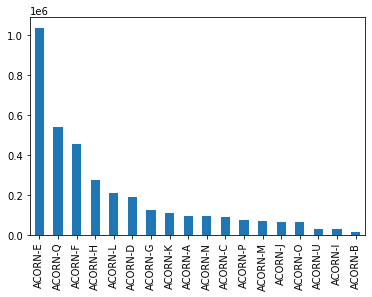

In [230]:
data.Acorn.value_counts().plot.bar()

In [232]:
data.head(3)

,LCLid,day,energy_median,energy_mean,energy_max,energy_count,energy_std,energy_sum,energy_min,temperatureMax,...,summary,temperatureLowTime,apparentTemperatureMin,apparentTemperatureMaxTime,apparentTemperatureLowTime,moonPhase,stdorToU,Acorn,Acorn_grouped,file
613782,MAC000152,2011-11-23,0.1725,0.248708,0.798,24,0.193996,5.969,0.055,10.36,...,Foggy in the morning.,2011-11-23 22:00:00,2.18,2011-11-23 14:00:00,2011-11-23 22:00:00,0.94,Std,ACORN-E,Affluent,block_24
867863,MAC000156,2011-11-23,0.2745,0.296500,0.512,22,0.108046,6.523,0.162,10.36,...,Foggy in the morning.,2011-11-23 22:00:00,2.18,2011-11-23 14:00:00,2011-11-23 22:00:00,0.94,Std,ACORN-F,Comfortable,block_48
2284897,MAC000155,2011-11-23,0.3020,0.421864,0.961,22,0.240825,9.281,0.110,10.36,...,Foggy in the morning.,2011-11-23 22:00:00,2.18,2011-11-23 14:00:00,2011-11-23 22:00:00,0.94,Std,ACORN-D,Affluent,block_11


In [231]:
data.columns

Index(['LCLid', 'day', 'energy_median', 'energy_mean', 'energy_max',
       'energy_count', 'energy_std', 'energy_sum', 'energy_min',
       'temperatureMax', 'windBearing', 'icon', 'dewPoint',
       'temperatureMinTime', 'cloudCover', 'windSpeed', 'pressure',
       'apparentTemperatureMinTime', 'apparentTemperatureHigh', 'precipType',
       'visibility', 'humidity', 'apparentTemperatureHighTime',
       'apparentTemperatureLow', 'apparentTemperatureMax', 'uvIndex', 'time',
       'sunsetTime', 'temperatureLow', 'temperatureMin', 'temperatureHigh',
       'sunriseTime', 'temperatureHighTime', 'uvIndexTime', 'summary',
       'temperatureLowTime', 'apparentTemperatureMin',
       'apparentTemperatureMaxTime', 'apparentTemperatureLowTime', 'moonPhase',
       'stdorToU', 'Acorn', 'Acorn_grouped', 'file'],
      dtype='object')